In [99]:
import sympy
from sympy import Matrix

# define starting point
START_POINT = (-2.7, 3.0)
# define function for evaluation
FUNC_EXPRESSION = "(1-x)^2 + 100*(y-x*x)^2"
# Epsilon as an exit condition
EPSILON = 10 ** -8
# Destination (we are looking for minimum)
DEST = 0
# Maximum number of iterations
ITER_MAX = 1000
# Alpha coefficient
DEFAULT_ALPHA = 1


def newton_iterate(alpha, starting_vector, n_iterations=ITER_MAX, f_expr=FUNC_EXPRESSION, destination=DEST,
                   epsilon=EPSILON):
    starting_vector = sympy.Matrix(starting_vector)

    # compute bounds for exit condition
    lower_bound = destination - epsilon
    upper_bound = destination + epsilon

    # get symbols from sympy
    x, y = sympy.symbols("x y")
    f = sympy.sympify(f_expr)

    gradient = Matrix([f.diff(e) for e in [x, y]])  # compute gradient vector
    hessian = Matrix([[f.diff(p1).diff(p2) for p1 in [x, y]] for p2 in [x, y]])  # compute Hessian
    hessian = hessian.inv()  # Invert hessian for usage of algorithm
    results = list()
    for i in range(0, n_iterations):
        sub_inp = dict(zip([x, y], starting_vector))
        value_at_point = f.subs(sub_inp).doit()
        results.append(sympy.N(value_at_point))
        if lower_bound <= value_at_point <= upper_bound:
            break
        starting_vector = starting_vector - alpha * hessian.subs(sub_inp) * gradient.subs(sub_inp)
    return results

In [123]:
r = list()
for i in range(1, 11):
    r.append(newton_iterate(i/10, START_POINT))
    


In [127]:
plt.rcParams['figure.figsize'] = [9, 7]

Text(0, 0.5, 'Liczba iteracji')

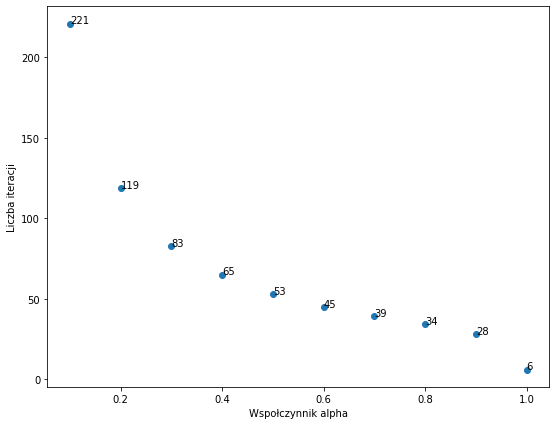

In [151]:
fig, ax = plt.subplots()
xs = [i/10 for i in range(1, 11)]
ys = [len(x) for x in r]
ax.scatter(xs, ys)
for (x,y) in zip(xs, ys):
    ax.annotate(y, (x,y))


plt.xlabel("Wspołczynnik alpha")
plt.ylabel("Liczba iteracji")

In [141]:
r1 = list()
alphas = [0.5, 0.75, 0.9]
for i in alphas:
    r1.append(newton_iterate(i, (4, 4)))
    

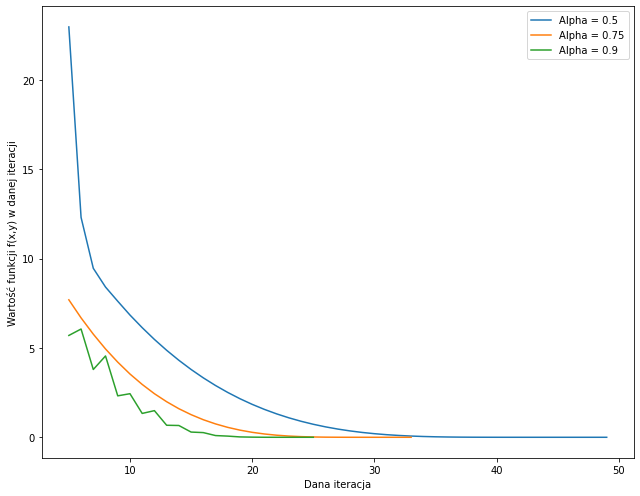

In [150]:
fig, ax = plt.subplots()
for i,p in enumerate(r1):
    ax.plot([e for e in range(5, len(p))],p[5:], label=f"Alpha = {alphas[i]}")
plt.legend()
plt.ylabel("Wartość funkcji f(x,y) w danej iteracji")
plt.xlabel("Dana iteracja")
fig.tight_layout()

In [162]:
points = [(3,3), (0.5, 0.5), (-5,5)]
ALPHA = 0.75
r2 = list()
for p in points:
    r2.append(newton_iterate(ALPHA, p))

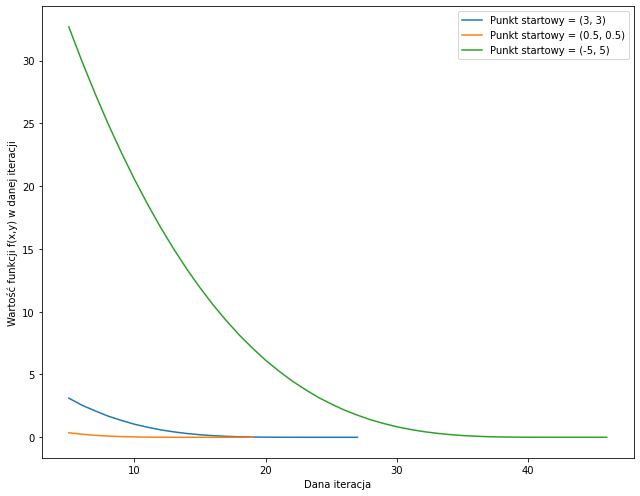

In [163]:
fig, ax = plt.subplots()
for i,p in enumerate(r2):
    ax.plot([e for e in range(5, len(p))],p[5:], label=f"Punkt startowy = {points[i]}")
plt.legend()
plt.ylabel("Wartość funkcji f(x,y) w danej iteracji")
plt.xlabel("Dana iteracja")
fig.tight_layout()

In [164]:
def newton_iterate_for_3d_animation(alpha, starting_vector, n_iterations=ITER_MAX, f_expr=FUNC_EXPRESSION, destination=DEST,
                   epsilon=EPSILON):
    starting_vector = sympy.Matrix(starting_vector)

    # compute bounds for exit condition
    lower_bound = destination - epsilon
    upper_bound = destination + epsilon

    # get symbols from sympy
    x, y = sympy.symbols("x y")
    f = sympy.sympify(f_expr)

    gradient = Matrix([f.diff(e) for e in [x, y]])  # compute gradient vector
    hessian = Matrix([[f.diff(p1).diff(p2) for p1 in [x, y]] for p2 in [x, y]])  # compute Hessian
    hessian = hessian.inv()  # Invert hessian for usage of algorithm
    results = list()
    xses = list()
    yses = list()
    for i in range(0, n_iterations):
        sub_inp = dict(zip([x, y], starting_vector))
        value_at_point = f.subs(sub_inp).doit()
        results.append(sympy.N(value_at_point))
        xses.append(sympy.N(starting_vector[0]))
        yses.append(sympy.N(starting_vector[1]))
        if lower_bound <= value_at_point <= upper_bound:
            break
        starting_vector = starting_vector - alpha * hessian.subs(sub_inp) * gradient.subs(sub_inp)
    return (results, xses, yses)

In [261]:
zses, xses, yses = newton_iterate_for_3d_animation(0.75, (-5,5))

In [262]:
iterations = len(xses)
print(iterations)

47


In [266]:
def update_graph(num):
    graph._offsets3d = (xses[num], yses[num], zses[num])
    title.set_text('3D Test, time={}'.format(num))
    

In [227]:
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import cm
import matplotlib.animation as animation
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

In [186]:
def rosenbrock(x, y):
    return (1-x)**2 + 100*((y-x**2)**2)

In [251]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)



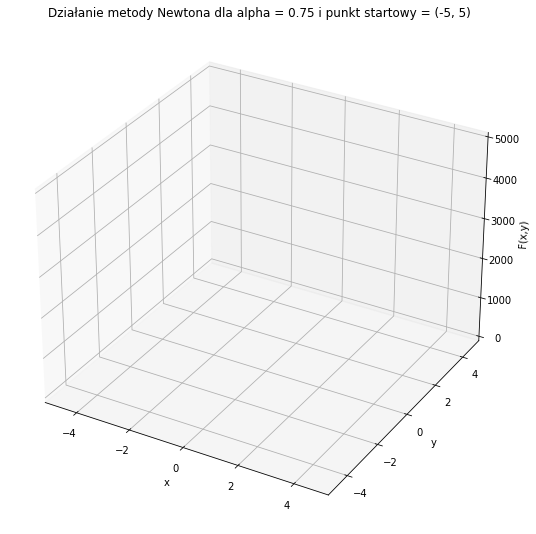

In [276]:
fig = plt.figure()
ax = p3.Axes3D(fig)
ax.set_xlim3d([-5, 5])
ax.set_xlabel('x')

ax.set_ylim3d([-5, 5])
ax.set_ylabel('y')

ax.set_zlim3d([-10, 5000])
ax.set_zlim(-10,5000)
ax.set_zlabel('F(x,y)')
from IPython.display import HTML
from matplotlib import animation, rc

# surf = ax.plot_wireframe(X, Y, Z, color="blue")
ax.set_title('Działanie metody Newtona dla alpha = 0.75 i punkt startowy = (-5, 5)')

graph = ax.scatter(xses[0], yses[0], zses[0])
anim = animation.FuncAnimation(fig, update_graph, iterations,
                                       interval=50, blit=False, repeat=True)
HTML(anim.to_html5_video())
rc('animation', html='html5')


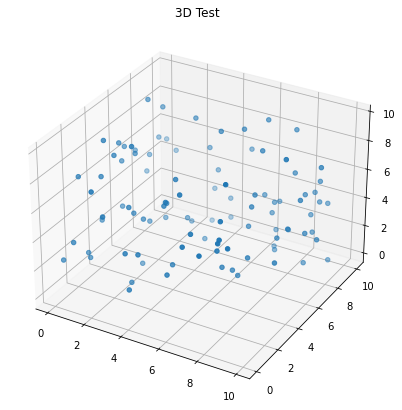

In [271]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation
import pandas as pd
from IPython.display import HTML

a = np.random.rand(2000, 3)*10
t = np.array([np.ones(100)*i for i in range(20)]).flatten()
df = pd.DataFrame({"time": t ,"x" : a[:,0], "y" : a[:,1], "z" : a[:,2]})

def update_graph(num):
    data=df[df['time']==num]
    graph._offsets3d = (data.x, data.y, data.z)
    title.set_text('3D Test, time={}'.format(num))


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
title = ax.set_title('3D Test')

data=df[df['time']==0]
graph = ax.scatter(data.x, data.y, data.z)

ani = matplotlib.animation.FuncAnimation(fig, update_graph, 19, 
                               interval=40, blit=False)
